# Analyse statistique de la concentration d'ozone à Rennes (été 2001)
L'objectif est d'étudier l'influence de différents paramètres météorologiques sur la concentration d'ozone (O3). Les données proviennent de mesures effectuées à Rennes pendant l'été 2001.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

%matplotlib inline



---



**2.2 Exploration statistique  ́elementaire**

**Lecture des données**

In [ ]:
# Chargement des données
ozone = pd.read_csv('ozone (1).csv', sep=';')

# Suppression de la colonne 'obs' inutile
ozone.drop('obs', axis=1, inplace=True)

# Affichage des premières lignes
ozone.head()

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
0,87,"15,6","18,5","18,4",4,4,8,"0,6946","-1,7101","-0,6946",84,Nord,Sec
1,82,17,"18,4","17,7",5,5,7,"-4,3301",-4,-3,87,Nord,Sec
2,92,"15,3","17,6","19,5",2,5,4,"2,9544","1,8794","0,5209",82,Est,Sec
3,114,"16,2","19,7","22,5",1,1,0,"0,9848","0,3473","-0,1736",92,Nord,Sec
4,94,"17,4","20,5","20,4",8,8,7,"-0,5","-2,9544","-4,3301",114,Ouest,Sec


**Description unidimensionnelle**

In [ ]:
# Liste des variables quantitatives
quantitative_vars = ['maxO3', 'T9', 'T12', 'T15',
                     'Ne9', 'Ne12', 'Ne15',
                     'Vx9', 'Vx12', 'Vx15',
                     'maxO3v']

# Statistiques descriptives
ozone[quantitative_vars].describe()


,maxO3,Ne9,Ne12,Ne15,maxO3v
count,112.000000,112.000000,112.000000,112.000000,112.000000
mean,90.303571,4.928571,5.017857,4.830357,90.571429
std,28.187225,2.594916,2.281860,2.332259,28.276853
min,42.000000,0.000000,0.000000,0.000000,42.000000
25%,70.750000,3.000000,4.000000,3.000000,71.000000
50%,81.500000,6.000000,5.000000,5.000000,82.500000
75%,106.000000,7.000000,7.000000,7.000000,106.000000
max,166.000000,8.000000,8.000000,8.000000,166.000000


In [ ]:
# Description des variables qualitatives
qualitative_vars = ['vent', 'pluie']
for var in qualitative_vars:
    print(f"\nVariable: {var}")
    print(ozone[var].value_counts())


Variable: vent
vent
Ouest    50
Nord     31
Sud      21
Est      10
Name: count, dtype: int64

Variable: pluie
pluie
Sec      69
Pluie    43
Name: count, dtype: int64


**Visualisations univariées**

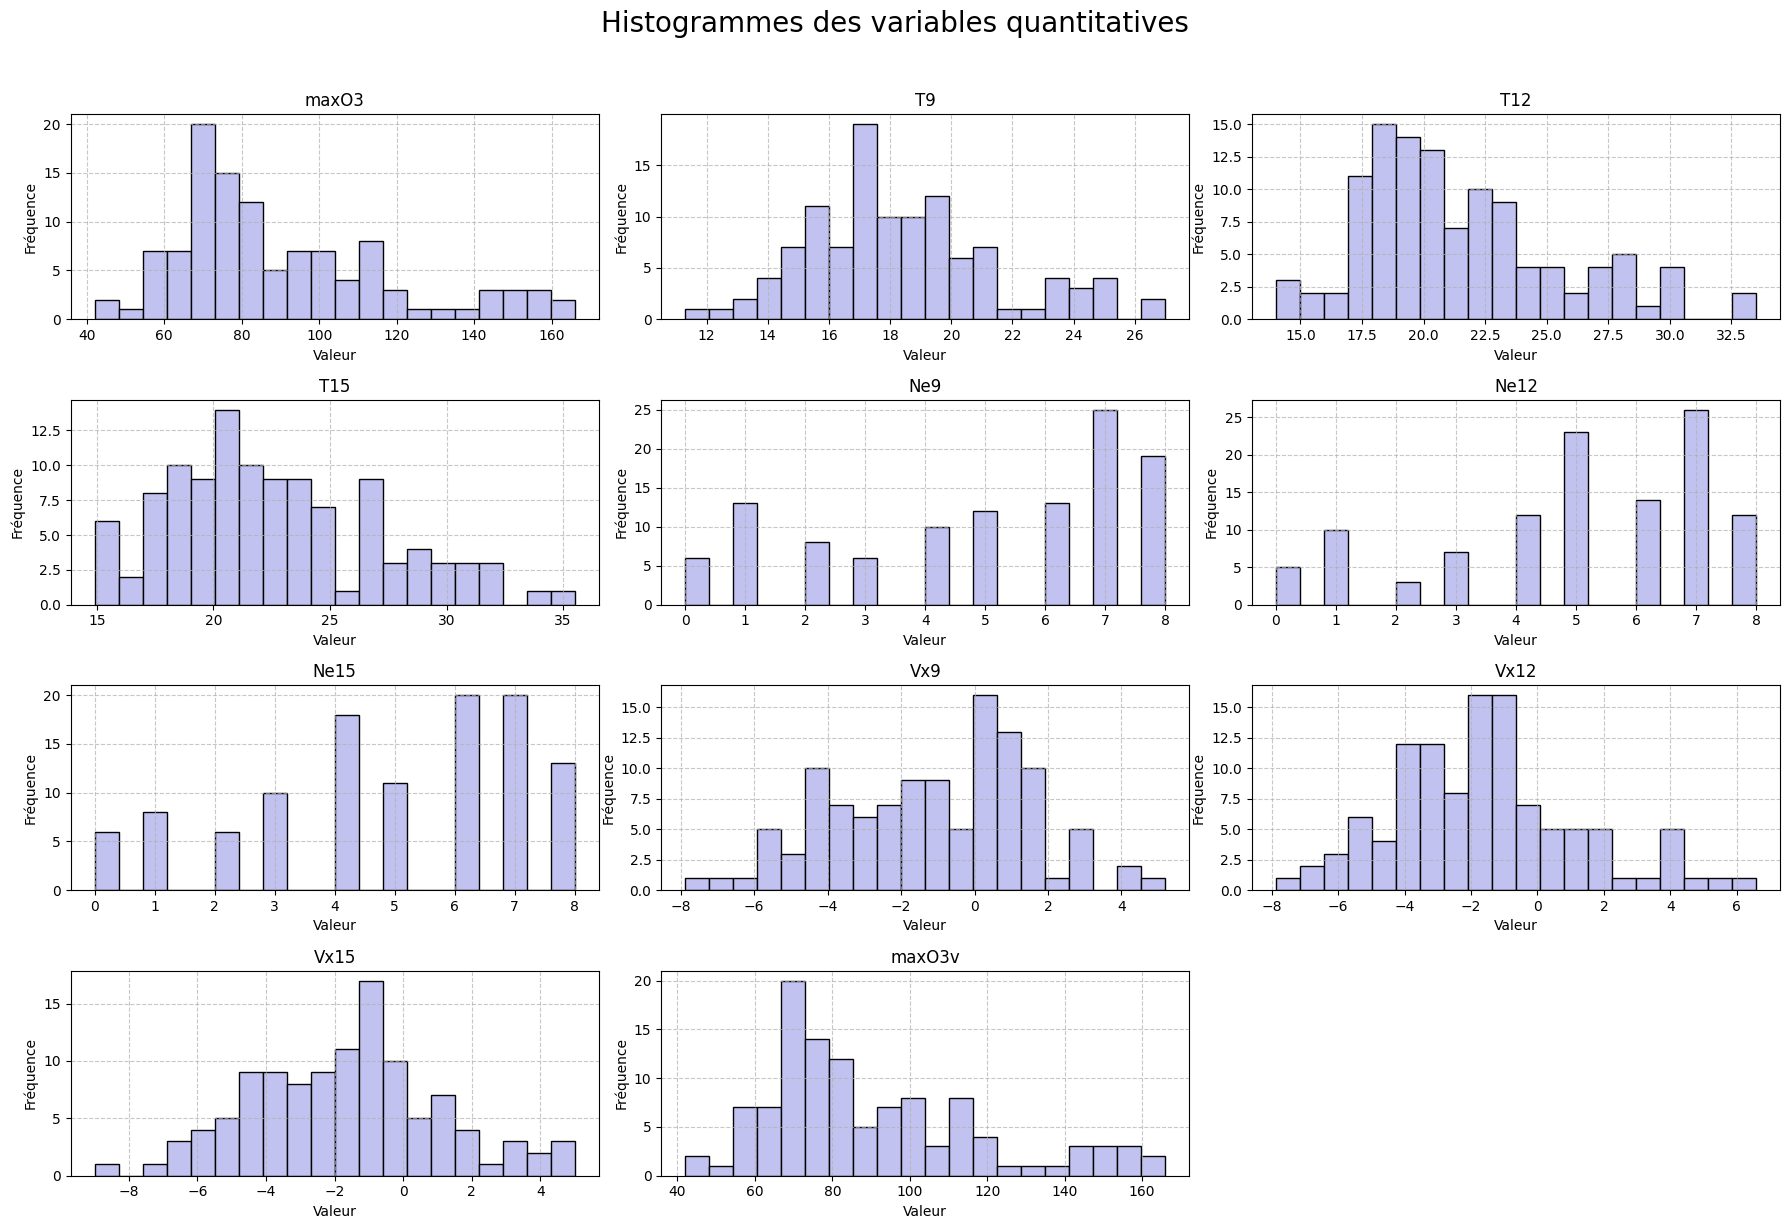

In [ ]:
# Histogrammes pour les variables quantitatives
ax = ozone[quantitative_vars].hist(figsize=(18, 12), bins=20, edgecolor='black', color='#c2c2f0')
# Ajouter des titres pour chaque sous-graphique
for axs in ax.flatten():
    axs.set_title(axs.get_title(), fontsize=12)
    axs.set_xlabel('Valeur', fontsize=10)
    axs.set_ylabel('Fréquence', fontsize=10)
    axs.grid(True, linestyle='--', alpha=0.7)

plt.suptitle('Histogrammes des variables quantitatives', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

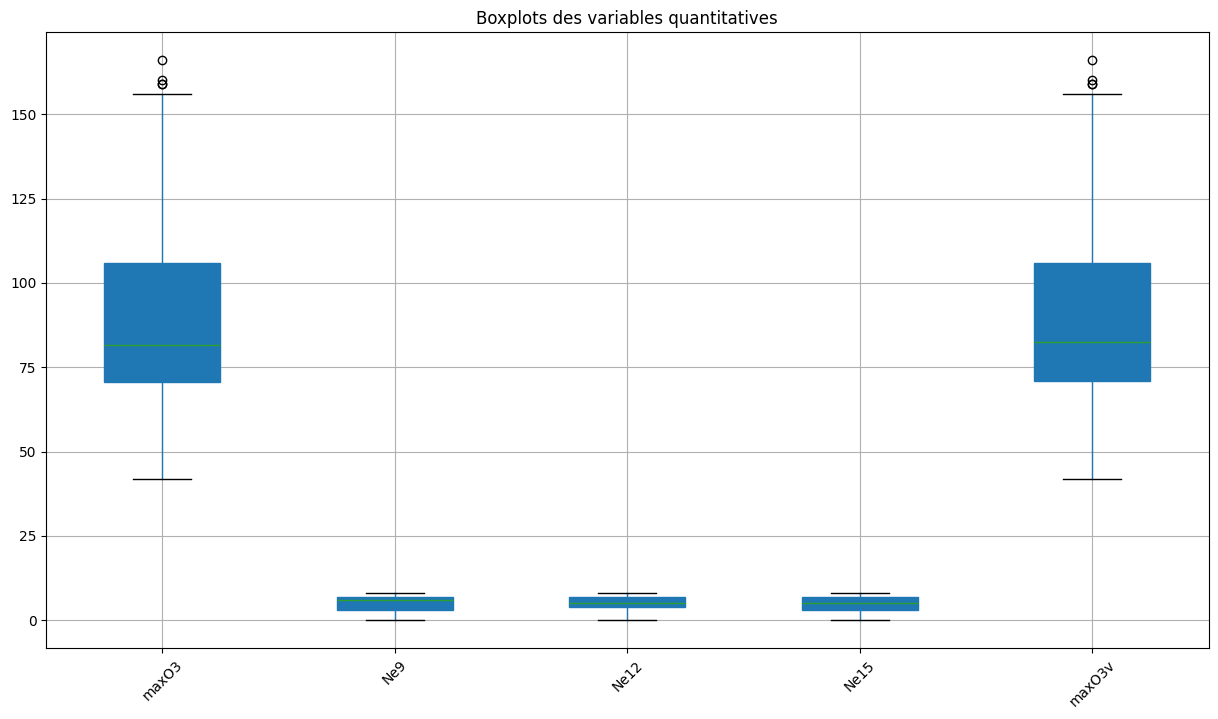

In [ ]:
# Boxplots pour les variables quantitatives
plt.figure(figsize=(15, 8))
ax = ozone[quantitative_vars].boxplot(patch_artist=True)  # Ajout patch_artist=True pour appliquer des couleurs

# Définir une liste de couleurs (11 couleurs pour 11 variables)
colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow',
          'lightcoral', 'plum', 'khaki', 'lavender', 'lightsalmon',
          'lightseagreen', 'lightsteelblue']

# Modifier les couleurs de chaque boîte
for patch, color in zip(plt.gca().artists, colors):
    patch.set_facecolor(color)

plt.xticks(rotation=45)
plt.title('Boxplots des variables quantitatives')
plt.show()


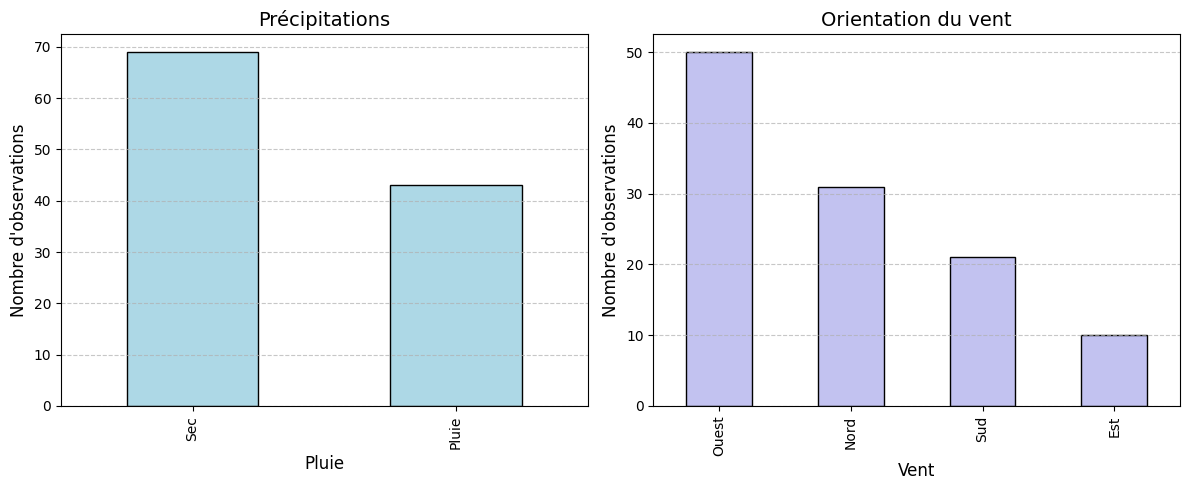

In [ ]:
# Diagrammes en barres pour les variables qualitatives
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Diagramme pour 'pluie'
ozone['pluie'].value_counts().plot(kind='bar', ax=axes[0], color='lightblue', edgecolor='black')
axes[0].set_title('Précipitations', fontsize=14)
axes[0].set_xlabel('Pluie', fontsize=12)
axes[0].set_ylabel('Nombre d\'observations', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Diagramme pour 'vent'
ozone['vent'].value_counts().plot(kind='bar', ax=axes[1], color='#c2c2f0', edgecolor='black')
axes[1].set_title('Orientation du vent', fontsize=14)
axes[1].set_xlabel('Vent', fontsize=12)
axes[1].set_ylabel('Nombre d\'observations', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Description bidimensionnelle**

In [ ]:
# Remplacer les virgules par des points dans les colonnes quantitatives
ozone[quantitative_vars] = ozone[quantitative_vars].replace({',': '.'}, regex=True)

# Convertir les colonnes en type float
ozone[quantitative_vars] = ozone[quantitative_vars].astype(float)

# Vérification de la conversion
ozone[quantitative_vars].dtypes

,0
maxO3,float64
T9,float64
T12,float64
T15,float64
Ne9,float64
Ne12,float64
Ne15,float64
Vx9,float64
Vx12,float64
Vx15,float64


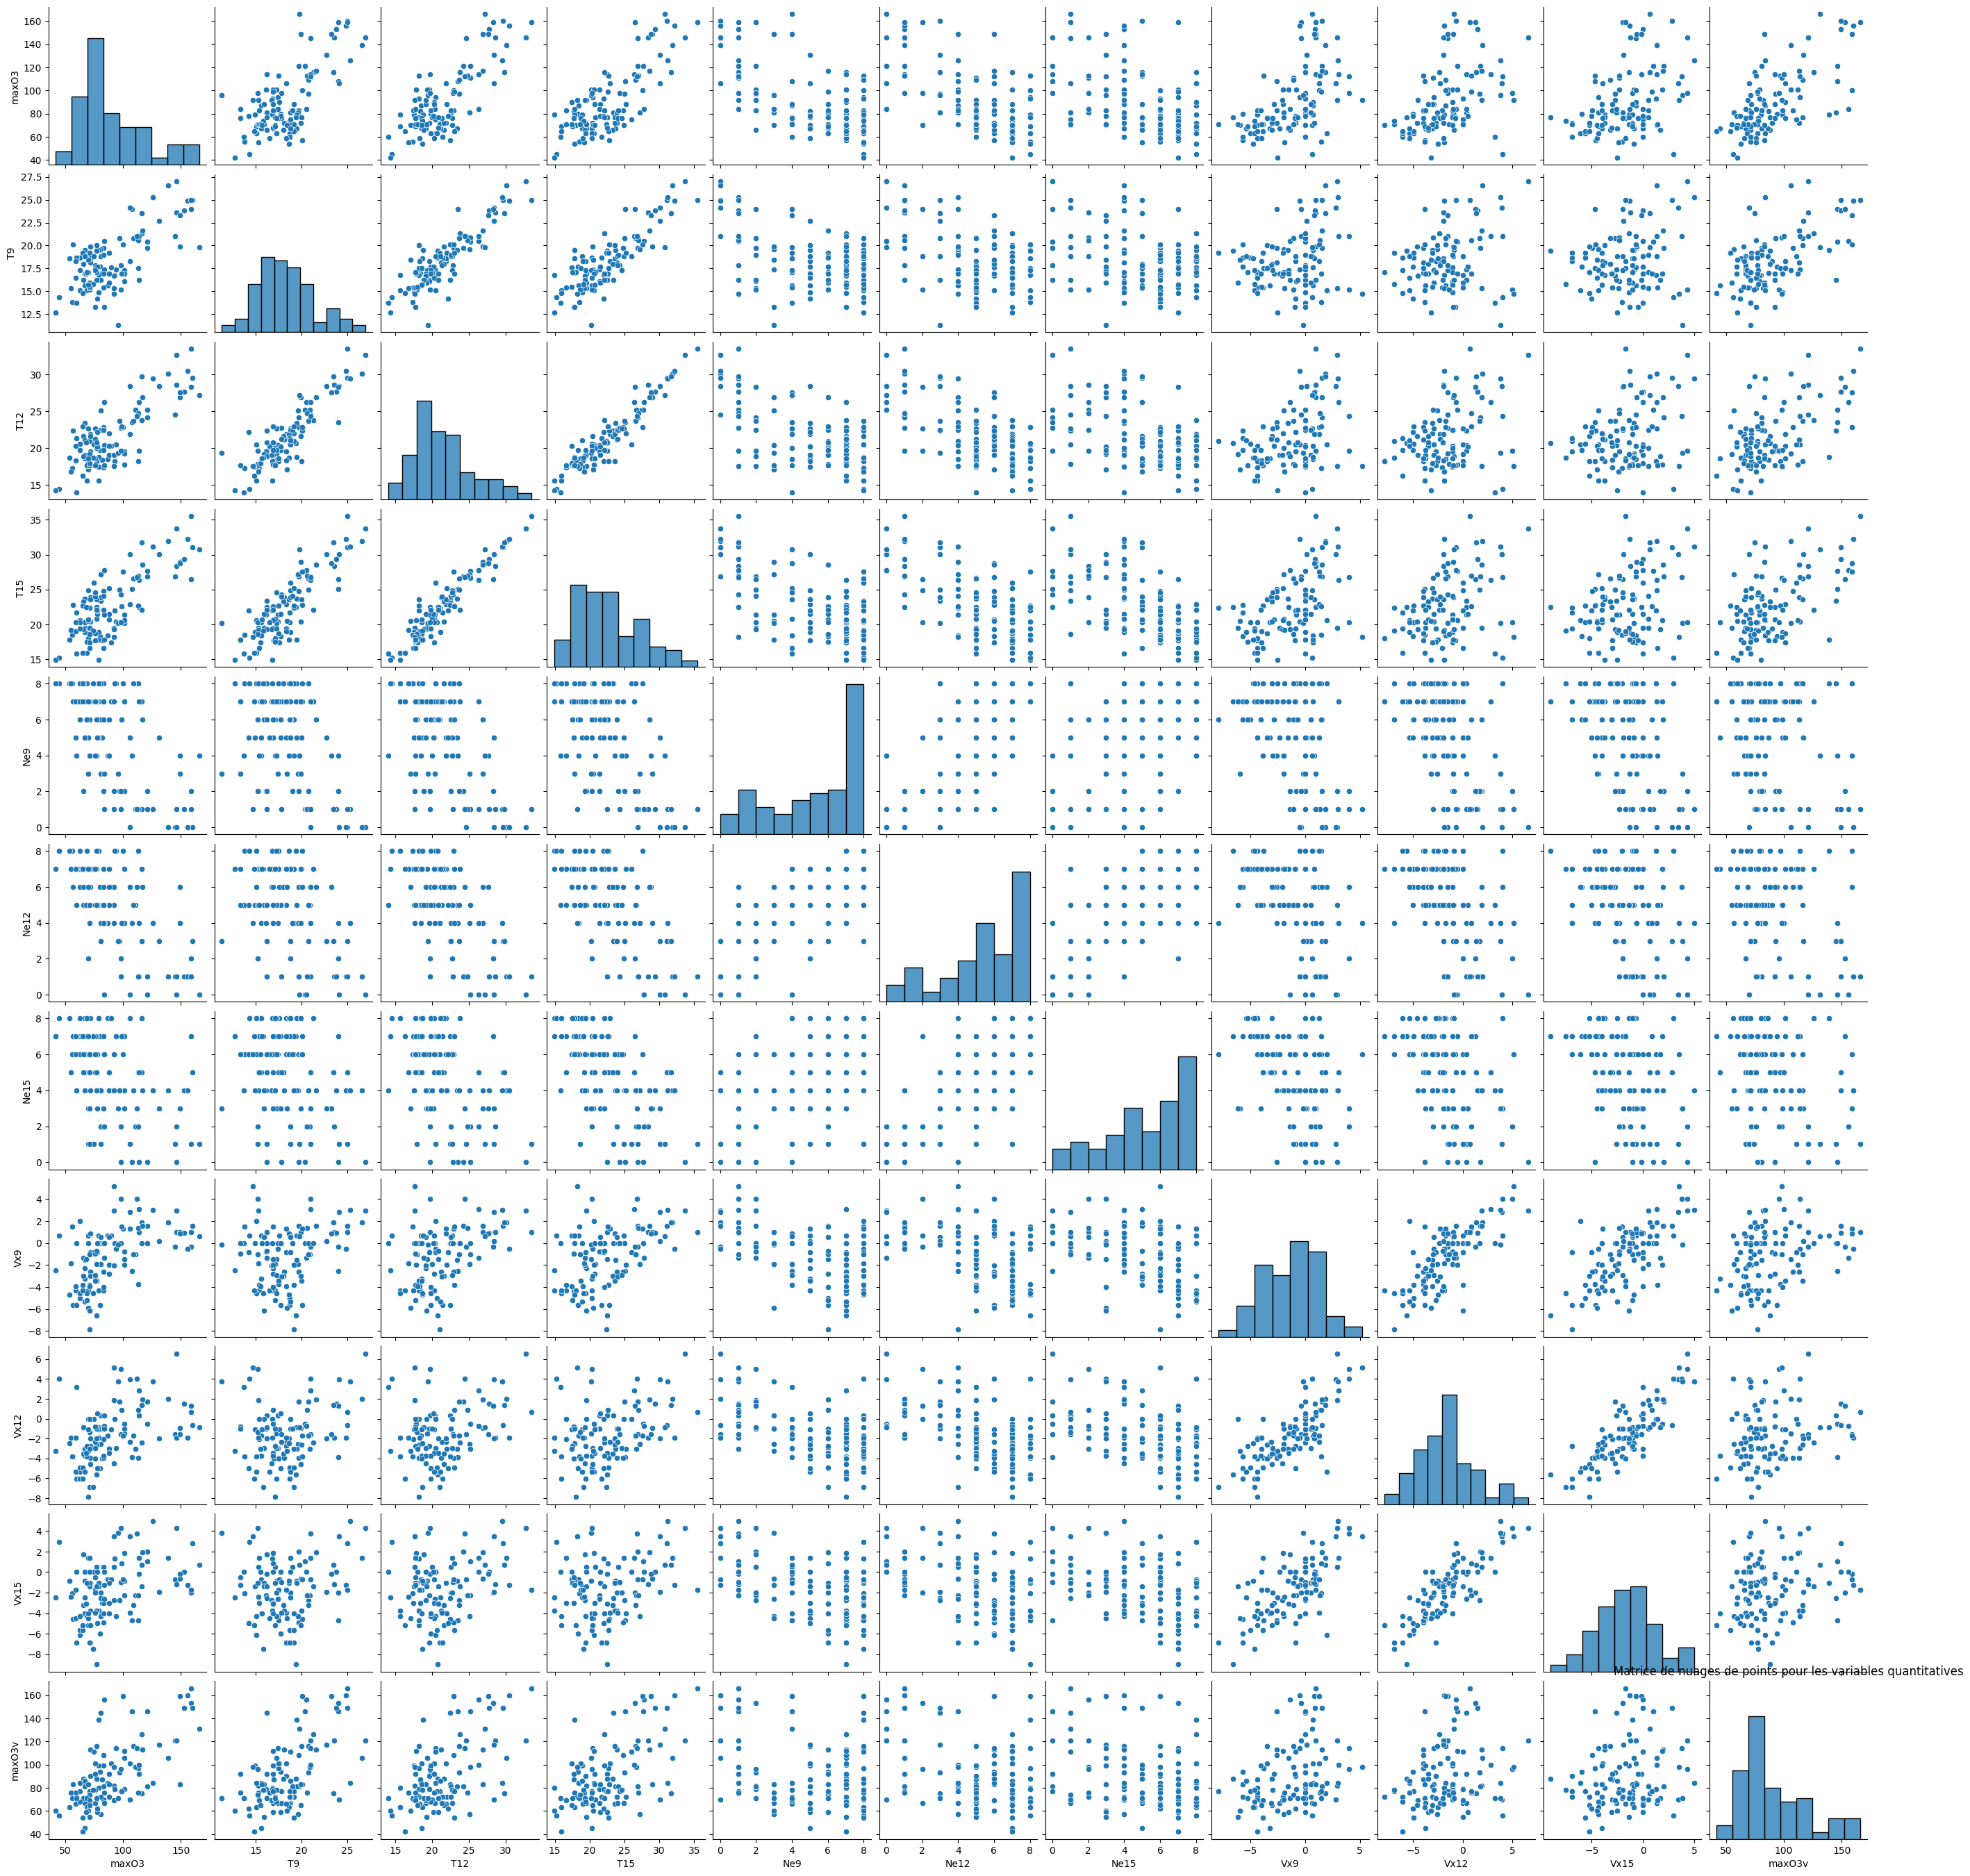

In [ ]:
# Paires de variables quantitatives
sns.pairplot(ozone[quantitative_vars])
plt.title('Matrice de nuages de points pour les variables quantitatives')
plt.show()

In [ ]:
# Pairplot avec des variables qualitatives (vent, pluie)
sns.pairplot(ozone, hue='vent', vars=quantitative_vars)
plt.title('Matrice de nuages de points par orientation du vent')
plt.show()


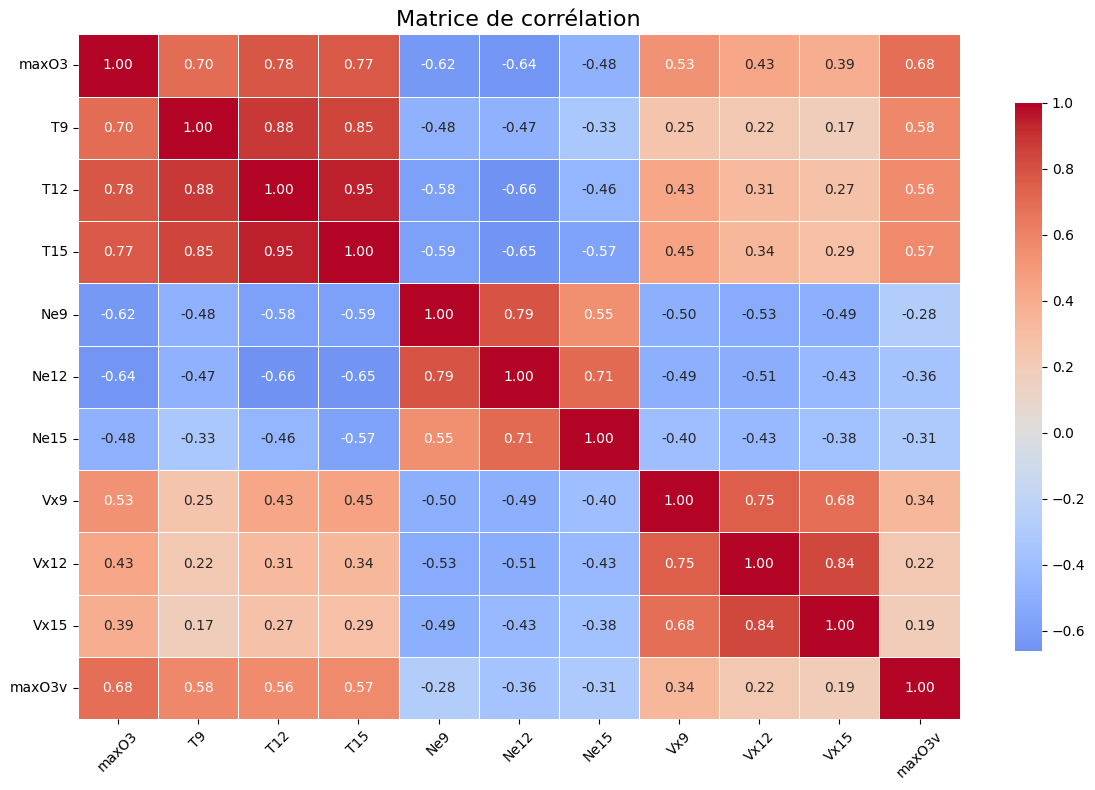

In [ ]:
# Matrice de corrélation
plt.figure(figsize=(12, 8))
correlation_matrix = ozone[quantitative_vars].corr()

sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",         # 2 décimales
            cmap='coolwarm',
            center=0,
            linewidths=0.5,    # lignes entre cases
            linecolor='white',
            cbar_kws={'shrink': 0.8})  # réduire la taille de la barre de couleur

plt.title('Matrice de corrélation', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


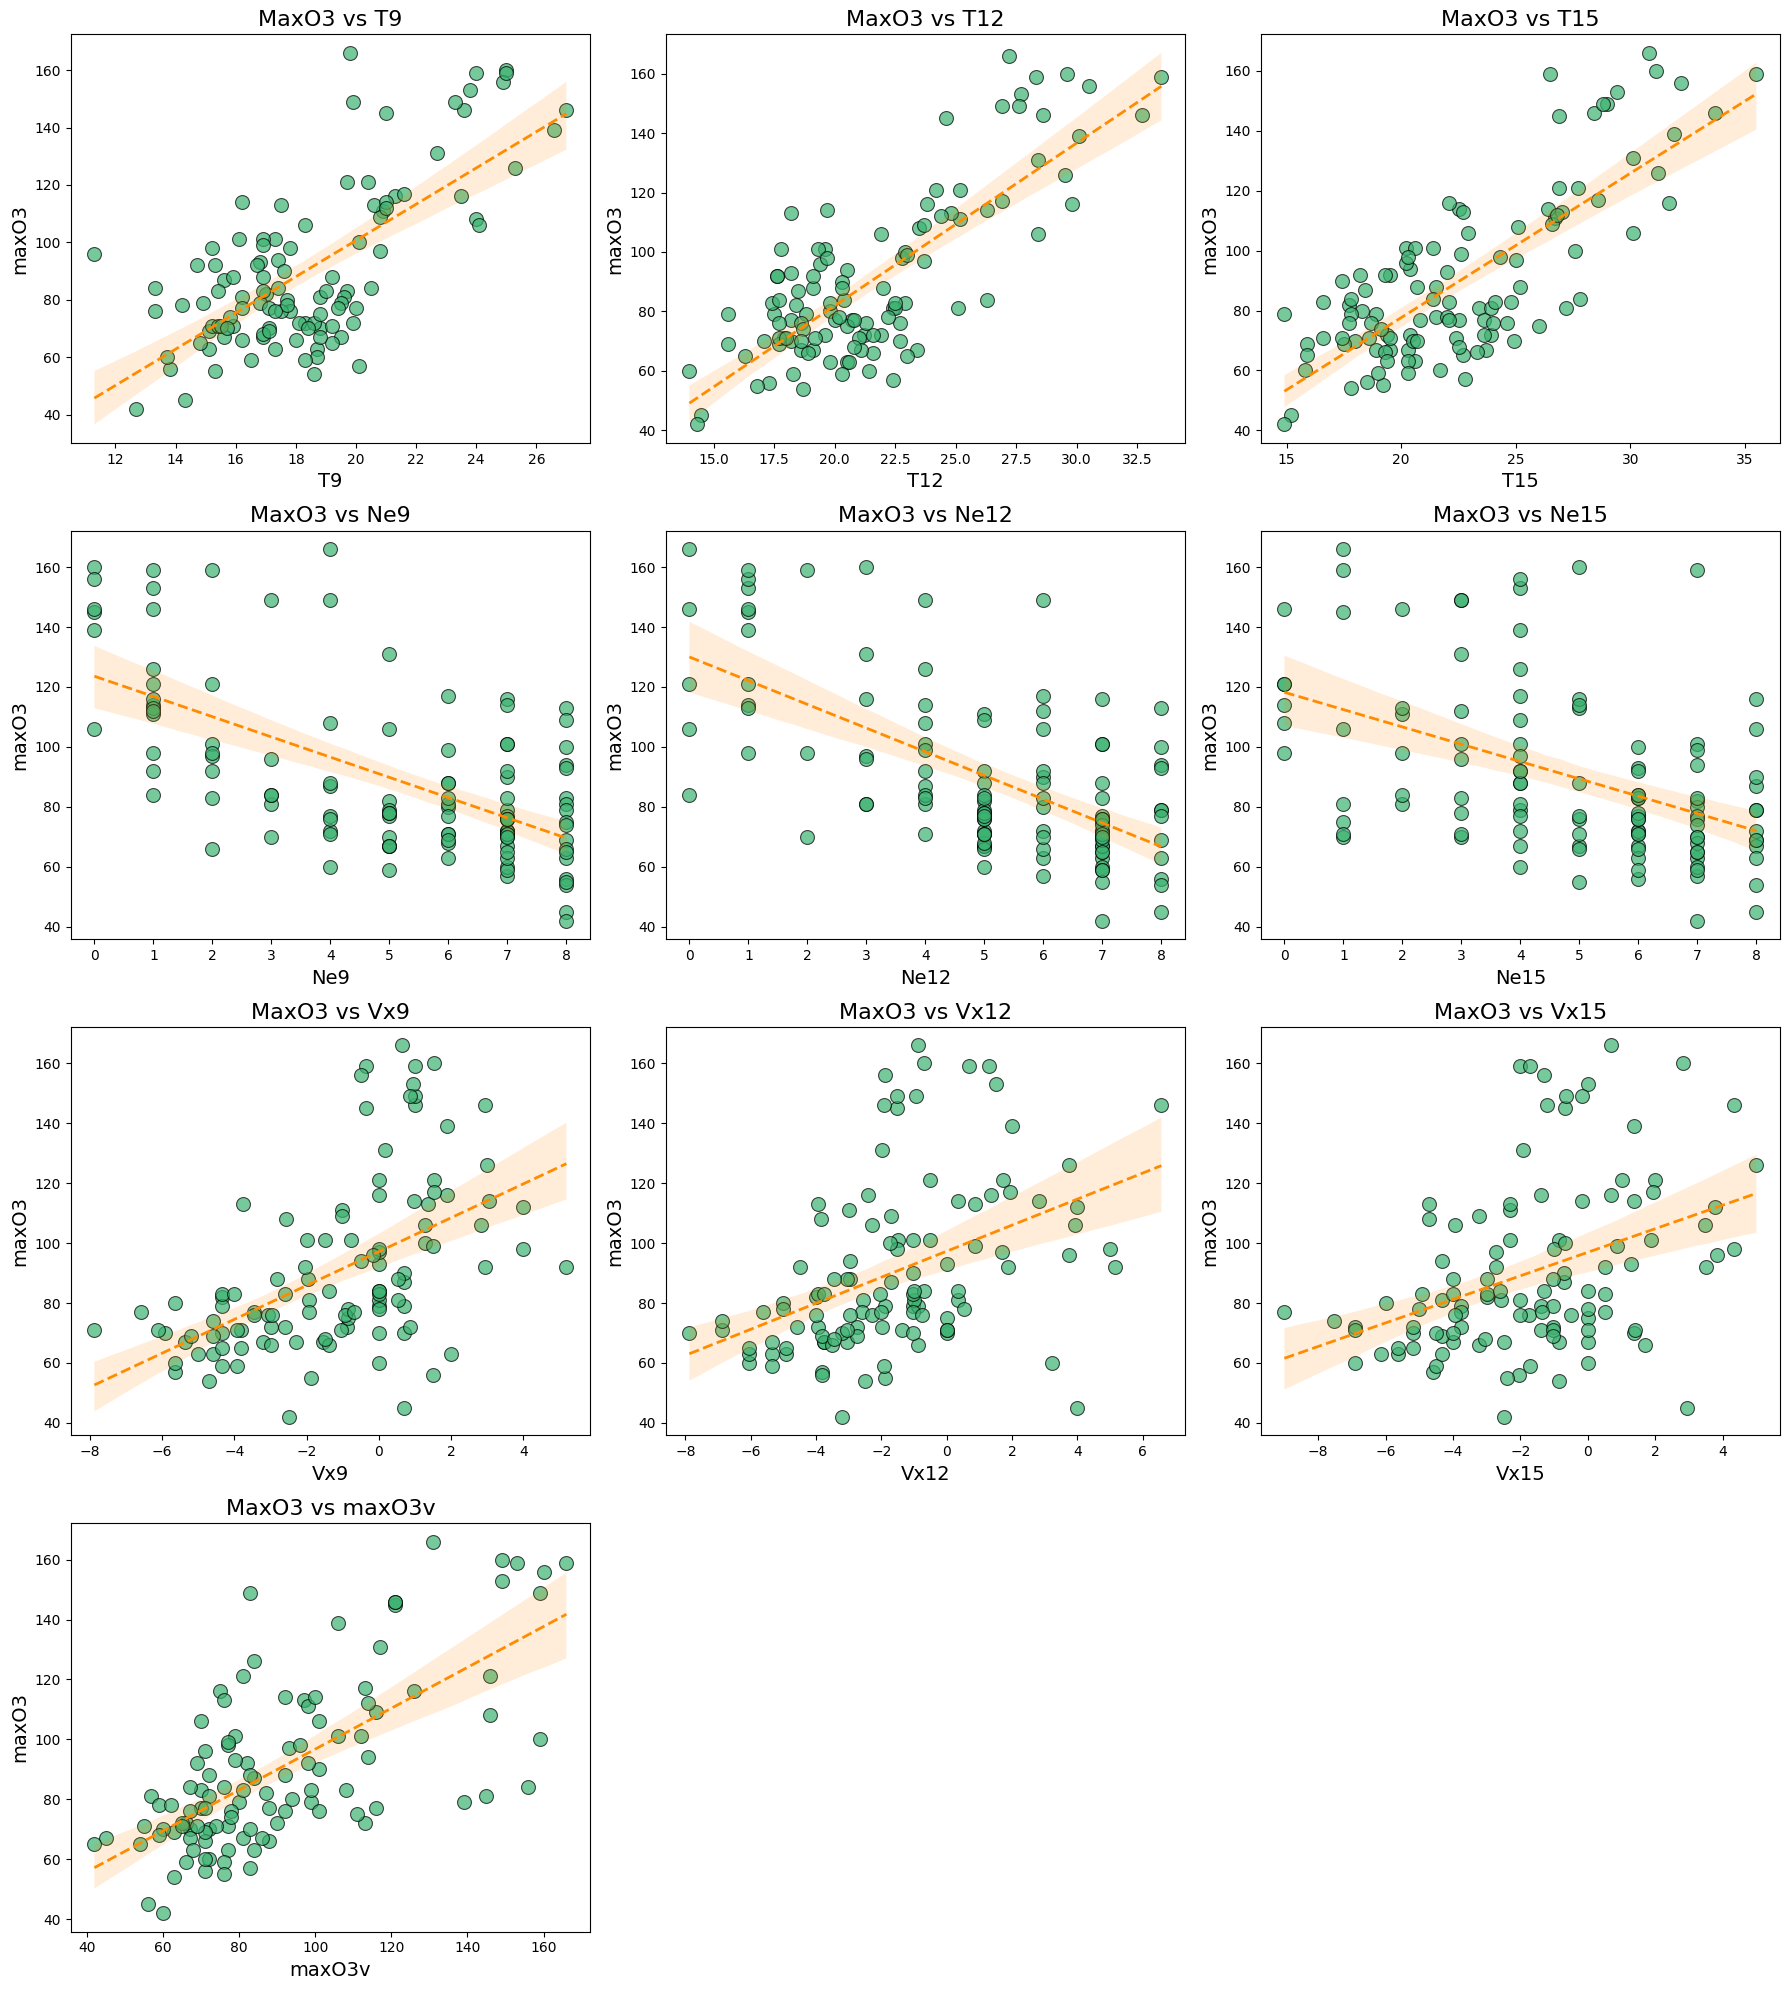

In [ ]:
import math

# Calculer le nombre de subplots nécessaires
num_plots = len(quantitative_vars) - 1  # Parce qu'on commence à partir de l'index 1
ncols = 3  # Nombre de colonnes
nrows = math.ceil(num_plots / ncols)  # Calcul dynamique du nombre de lignes

# Création du subplot avec la taille dynamique
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))

# Aplatir les axes pour itérer facilement dessus
axes = axes.flatten()

# Nuages de points entre maxO3 et les autres variables quantitatives
for i, var in enumerate(quantitative_vars[1:]):
    # Scatterplot
    sns.scatterplot(x=var, y='maxO3', data=ozone, color='mediumseagreen', s=100, edgecolor='black', marker='o', alpha=0.7, ax=axes[i])

    # Ajouter une ligne de tendance
    sns.regplot(x=var, y='maxO3', data=ozone, scatter=False, color='darkorange', line_kws={'linewidth': 2, 'linestyle': '--'}, ax=axes[i])

    # Personnalisation des titres et labels
    axes[i].set_title(f'MaxO3 vs {var}', fontsize=16)
    axes[i].set_xlabel(var, fontsize=14)
    axes[i].set_ylabel('maxO3', fontsize=14)

# Si il y a des axes vides, les supprimer
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajuster l'espacement et la disposition des subplots
plt.tight_layout()

# Afficher le graphique
plt.show()




<ipython-input-38-29bfb2f6fda1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='maxO3', data=ozone, palette='Set2')


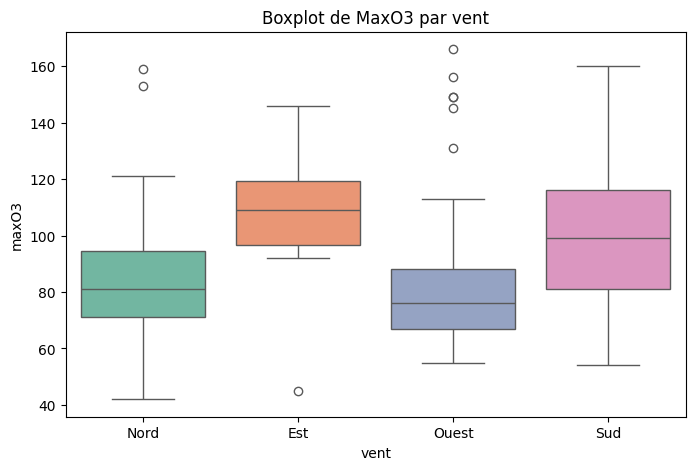

<ipython-input-38-29bfb2f6fda1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='maxO3', data=ozone, palette='Set2')


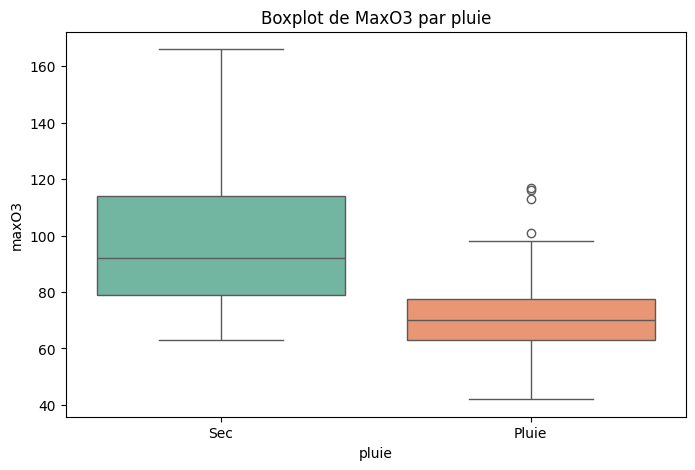

In [ ]:
# Boxplots pour toutes les variables qualitatives par rapport à MaxO3
for var in qualitative_vars:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=var, y='maxO3', data=ozone, palette='Set2')
    plt.title(f'Boxplot de MaxO3 par {var}')
    plt.show()


In [ ]:
# Table de contingence entre vent et pluie
contingency_table = pd.crosstab(ozone['vent'], ozone['pluie'])
print(contingency_table)


pluie  Pluie  Sec
vent             
Est        2    8
Nord      10   21
Ouest     26   24
Sud        5   16


In [ ]:
# Si vent est binaire (par exemple, Nord/Sud)
from scipy.stats import pointbiserialr

# Exemple pour vent (Nord vs autre)
ozone['vent_binary'] = ozone['vent'].apply(lambda x: 1 if x == 'Nord' else 0)
corr, p_value = pointbiserialr(ozone['vent_binary'], ozone['maxO3'])
print(f"Correlation entre vent et maxO3: {corr}, p-value: {p_value}")


Correlation entre vent et maxO3: -0.0920326833977406, p-value: 0.33449174688538896




---



**2.3 Tests de comparaisons**

**2.3.1 Normalité des distributions**

**Test de normalité : Test de Shapiro-Wilk pour MaxO3 et log(MaxO3)**
1. Test pour maxO3
Question posée :

La variable maxO3 suit-elle une distribution normale ?

Hypothèses :

H0 (hypothèse nulle) : maxO3 suit une distribution normale.


H1 (hypothèse alternative) : maxO3 ne suit pas une distribution normale.


Calcul de la p-valeur et décision :

La p-valeur associée au test de Shapiro-Wilk pour maxO3 est calculée.
Si la p-valeur est inférieure au seuil de significativité (généralement 0.05), nous rejetons l'hypothèse nulle et concluons que maxO3 ne suit pas une distribution normale.
Sinon, nous ne rejetons pas l'hypothèse nulle, indiquant que maxO3 suit une distribution normale.

In [ ]:

# Test de Shapiro-Wilk pour MaxO3
stat, p = stats.shapiro(ozone['maxO3'])
print(f"Test de Shapiro-Wilk pour MaxO3:\nStatistique={stat:.4f}, p-value={p:.4f}")

# Décision du test
if p < 0.05:
    print("Rejet de l'hypothèse nulle : maxO3 ne suit pas une distribution normale.")
else:
    print("On ne rejette pas l'hypothèse nulle : maxO3 suit une distribution normale.")


Test de Shapiro-Wilk pour MaxO3:
Statistique=0.9060, p-value=0.0000
Rejet de l'hypothèse nulle : maxO3 ne suit pas une distribution normale.


2. Test pour log(MaxO3)
Question posée :

La transformation logarithmique de maxO3 (log(MaxO3)) suit-elle une distribution normale ?

Hypothèses :

H0 (hypothèse nulle) : log(MaxO3) suit une distribution normale.
H1 (hypothèse alternative) : log(MaxO3) ne suit pas une distribution normale.

Calcul de la p-valeur et décision :

La p-valeur associée au test de Shapiro-Wilk pour log(MaxO3) est calculée.
Si la p-valeur est inférieure à 0.05, nous rejetons l'hypothèse nulle et concluons que log(MaxO3) ne suit pas une distribution normale.
Sinon, nous ne rejetons pas l'hypothèse nulle, ce qui indique que log(MaxO3) suit une distribution normale.



In [ ]:
# Test de Shapiro-Wilk pour log(MaxO3)
ozone['LmaxO3'] = np.log(ozone['maxO3'])
stat, p = stats.shapiro(ozone['LmaxO3'])
print(f"\nTest de Shapiro-Wilk pour log(MaxO3):\nStatistique={stat:.4f}, p-value={p:.4f}")

# Décision du test
if p < 0.05:
    print("Rejet de l'hypothèse nulle : log(MaxO3) ne suit pas une distribution normale.")
else:
    print("On ne rejette pas l'hypothèse nulle : log(MaxO3) suit une distribution normale.")



Test de Shapiro-Wilk pour log(MaxO3):
Statistique=0.9685, p-value=0.0095
Rejet de l'hypothèse nulle : log(MaxO3) ne suit pas une distribution normale.


**QQ-Plots**

Les QQ-plots permettent de visualiser la normalité d'une variable en comparant ses quantiles avec ceux d'une distribution normale théorique. Un bon QQ-plot pour une distribution normale aura des points qui suivent bien la droite de la distribution théorique.

**QQ-plot pour maxO3 :**

La couleur des points et les lignes ont été modifiées pour un meilleur contraste et une apparence plus claire.

**QQ-plot pour log(MaxO3) :**

Le QQ-plot pour log(MaxO3) présente les mêmes améliorations de couleur et de style pour rendre la visualisation plus agréable et plus lisible.

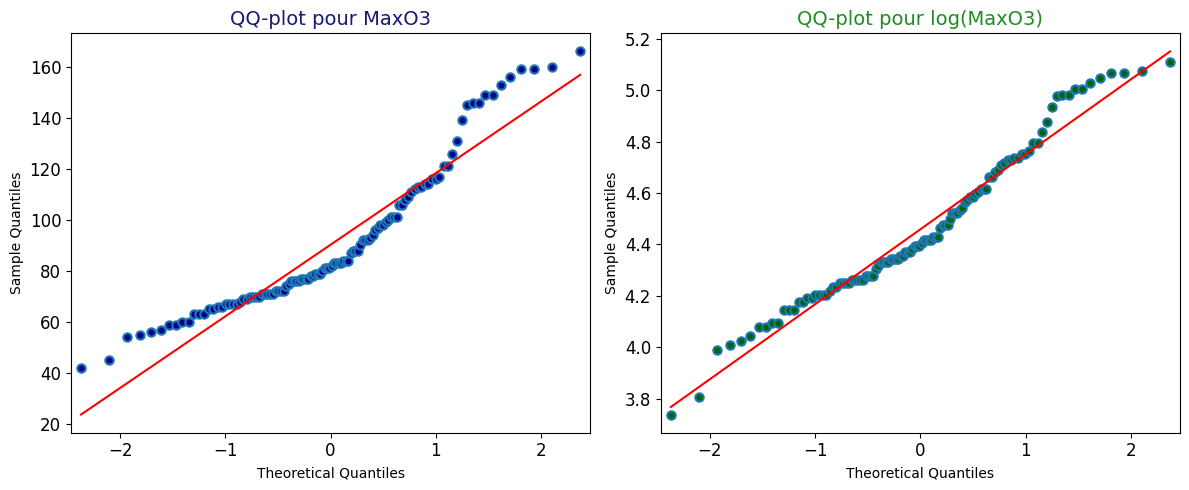

In [ ]:
# QQ-plots avec amélioration des couleurs et du style
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# QQ-plot pour MaxO3
sm.qqplot(ozone['maxO3'], line='s', ax=axes[0], color='cornflowerblue', markerfacecolor='darkblue', markeredgewidth=1.5)
axes[0].set_title('QQ-plot pour MaxO3', fontsize=14, color='midnightblue')
axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[0].tick_params(axis='both', which='minor', labelsize=10)

# QQ-plot pour log(MaxO3)
sm.qqplot(ozone['LmaxO3'], line='s', ax=axes[1], color='mediumseagreen', markerfacecolor='darkgreen', markeredgewidth=1.5)
axes[1].set_title('QQ-plot pour log(MaxO3)', fontsize=14, color='forestgreen')
axes[1].tick_params(axis='both', which='major', labelsize=12)
axes[1].tick_params(axis='both', which='minor', labelsize=10)

# Ajuster l'apparence générale
plt.tight_layout()
plt.show()

**Intervalle de confiance d'une moyenne**

In [ ]:
# Intervalle de confiance pour log(MaxO3)
ci = stats.t.interval(0.95, len(ozone['LmaxO3'])-1,
                    loc=ozone['LmaxO3'].mean(),
                    scale=stats.sem(ozone['LmaxO3']))
print(f"Intervalle de confiance à 95% pour la moyenne de log(MaxO3): [{ci[0]:.4f}, {ci[1]:.4f}]")

Intervalle de confiance à 95% pour la moyenne de log(MaxO3): [4.4043, 4.5140]


**Comparaison de deux variances (Test de Fisher)**

In [ ]:
# Séparation des données selon la pluie
groupe_pluie = ozone[ozone['pluie'] == 'Pluie']['LmaxO3']
groupe_sec = ozone[ozone['pluie'] == 'Sec']['LmaxO3']

# Test de Fisher
stat, p = stats.levene(groupe_pluie, groupe_sec)
print(f"Test d'égalité des variances (Levene):\nStatistique={stat:.4f}, p-value={p:.4f}")

Test d'égalité des variances (Levene):
Statistique=3.7090, p-value=0.0567


**Comparaison de deux moyennes**

In [ ]:
# Test t indépendant (variances égales)
stat, p = stats.ttest_ind(groupe_pluie, groupe_sec, equal_var=True)
print(f"Test t de Student (variances égales):\nStatistique={stat:.4f}, p-value={p:.4f}")

# Test t indépendant (variances inégales)
stat, p = stats.ttest_ind(groupe_pluie, groupe_sec, equal_var=False)
print(f"\nTest t de Welch (variances inégales):\nStatistique={stat:.4f}, p-value={p:.4f}")

# Test t apparié (MaxO3 vs MaxO3v)
stat, p = stats.ttest_rel(ozone['maxO3'], ozone['maxO3v'])
print(f"\nTest t apparié (MaxO3 vs MaxO3v):\nStatistique={stat:.4f}, p-value={p:.4f}")

Test t de Student (variances égales):
Statistique=-6.2161, p-value=0.0000

Test t de Welch (variances inégales):
Statistique=-6.4799, p-value=0.0000

Test t apparié (MaxO3 vs MaxO3v):
Statistique=-0.1264, p-value=0.8996


**2.3.2 Tests non paramétriques**

In [ ]:
# Test de Wilcoxon pour échantillons indépendants
stat, p = stats.mannwhitneyu(groupe_pluie, groupe_sec)
print(f"Test de Mann-Whitney (Wilcoxon indépendant):\nStatistique={stat:.4f}, p-value={p:.4f}")

# Test de Wilcoxon pour échantillons appariés
stat, p = stats.wilcoxon(ozone['maxO3'], ozone['maxO3v'])
print(f"\nTest de Wilcoxon apparié:\nStatistique={stat:.4f}, p-value={p:.4f}")

Test de Mann-Whitney (Wilcoxon indépendant):
Statistique=547.5000, p-value=0.0000

Test de Wilcoxon apparié:
Statistique=3033.0000, p-value=0.8253


**Indépendance de deux variables qualitatives (Test du χ²)**

In [ ]:
# Table de contingence
contingency_table = pd.crosstab(ozone['pluie'], ozone['vent'])

# Test du chi2
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Test du chi2:\nStatistique={chi2:.4f}, p-value={p:.4f}")
print("\nTable de contingence observée:")
print(contingency_table)
print("\nTable de contingence attendue sous H0:")
print(expected.round(2))

Test du chi2:
Statistique=7.7258, p-value=0.0520

Table de contingence observée:
vent   Est  Nord  Ouest  Sud
pluie                       
Pluie    2    10     26    5
Sec      8    21     24   16

Table de contingence attendue sous H0:
[[ 3.84 11.9  19.2   8.06]
 [ 6.16 19.1  30.8  12.94]]


**ANOVA et Kruskal-Wallis**

Test de Bartlett:
Statistique=0.5524, p-value=0.9072

Table ANOVA:
            sum_sq     df         F    PR(>F)
C(vent)   0.858769    3.0  3.562505  0.016649
Residual  8.678080  108.0       NaN       NaN

Test de Shapiro-Wilk sur les résidus:
Statistique=0.9665, p-value=0.0065


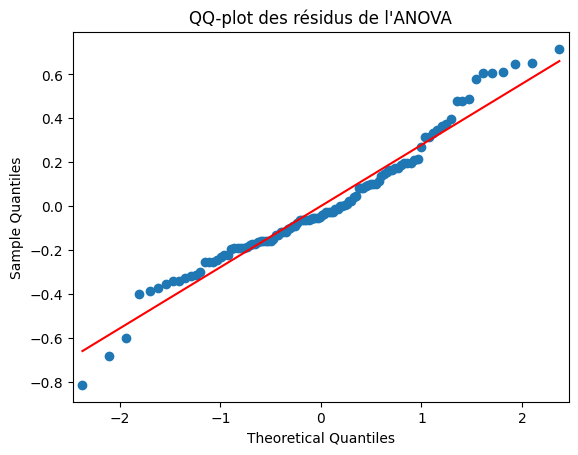


Test de Kruskal-Wallis:
Statistique=13.6449, p-value=0.0034


In [ ]:
# Test de Bartlett pour l'égalité des variances
stat, p = stats.bartlett(*[group['LmaxO3'] for name, group in ozone.groupby('vent')])
print(f"Test de Bartlett:\nStatistique={stat:.4f}, p-value={p:.4f}")

# ANOVA
model = ols('LmaxO3 ~ C(vent)', data=ozone).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nTable ANOVA:")
print(anova_table)

# Test de normalité des résidus
residuals = model.resid
stat, p = stats.shapiro(residuals)
print(f"\nTest de Shapiro-Wilk sur les résidus:\nStatistique={stat:.4f}, p-value={p:.4f}")

# QQ-plot des résidus
sm.qqplot(residuals, line='s')
plt.title('QQ-plot des résidus de l\'ANOVA')
plt.show()

# Test de Kruskal-Wallis
stat, p = stats.kruskal(*[group['maxO3'] for name, group in ozone.groupby('vent')])
print(f"\nTest de Kruskal-Wallis:\nStatistique={stat:.4f}, p-value={p:.4f}")



---



**2.4 Tests de liaison**

**Régression linéaire simple**

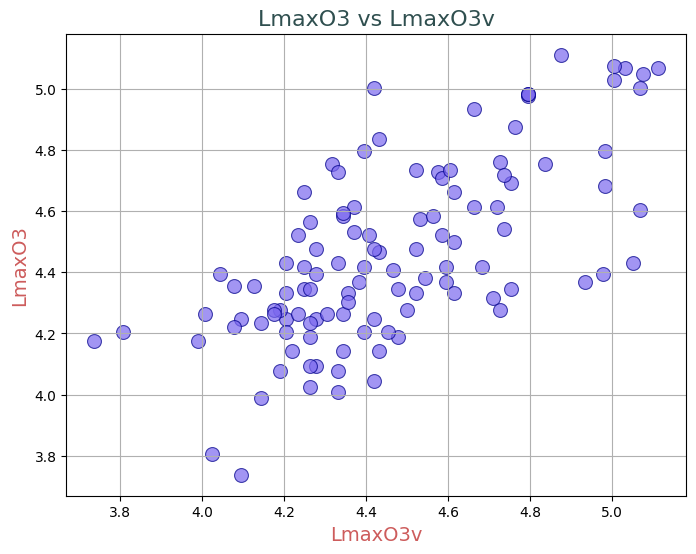

                            OLS Regression Results                            
Dep. Variable:                 LmaxO3   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     90.98
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           4.48e-16
Time:                        17:22:24   Log-Likelihood:                 12.777
No. Observations:                 112   AIC:                            -21.55
Df Residuals:                     110   BIC:                            -16.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4686      0.314      4.674      0.0

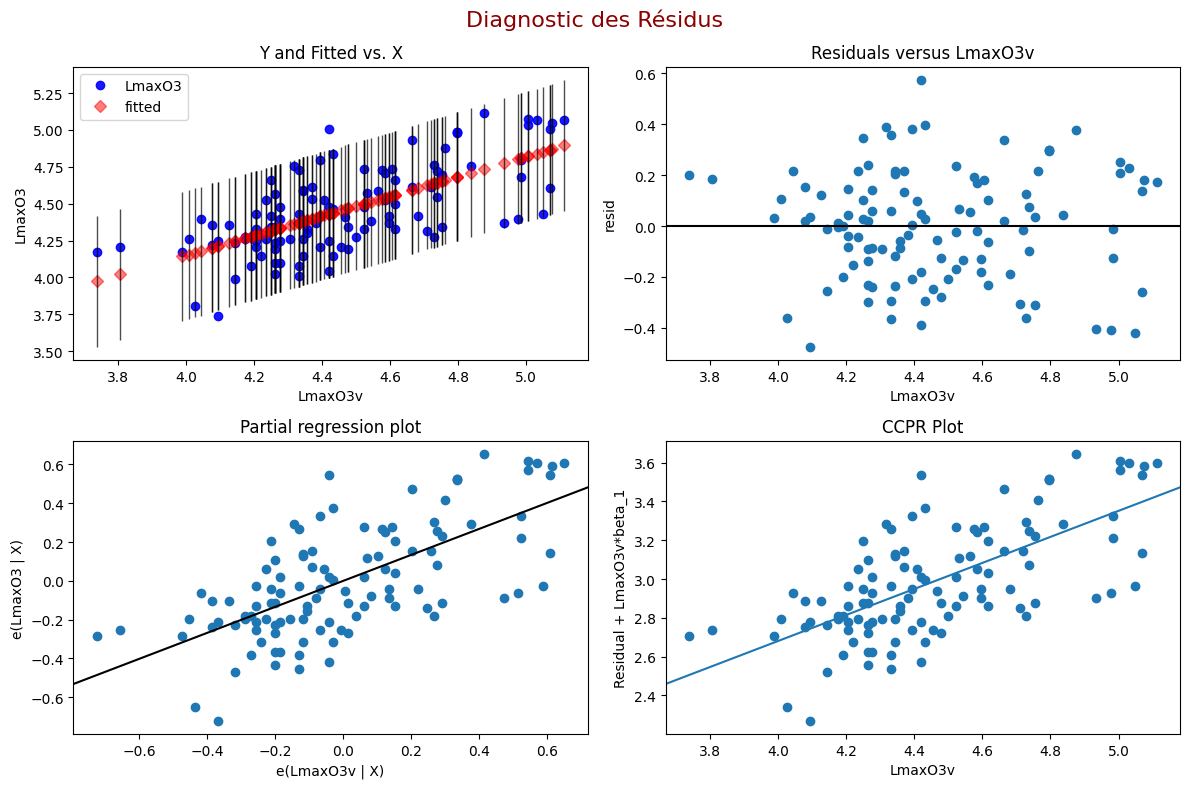

/usr/local/lib/python3.11/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 800x600 with 0 Axes>

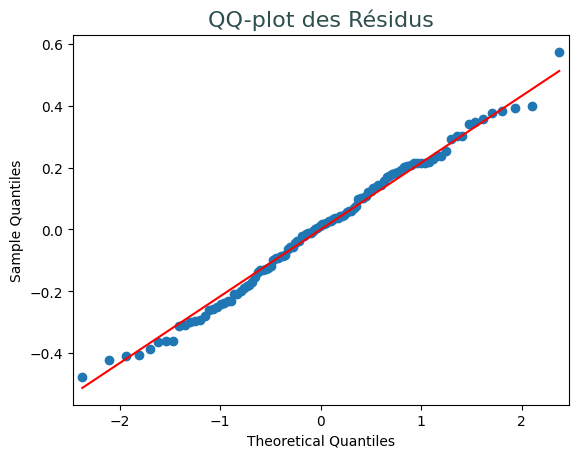


Test de Shapiro-Wilk sur les résidus:
Statistique=0.9897, p-value=0.5622


In [ ]:
# Transformation logarithmique pour MaxO3v
ozone['LmaxO3v'] = np.log(ozone['maxO3v'])

# Nuage de points avec couleur améliorée
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LmaxO3v', y='LmaxO3', data=ozone, color='mediumslateblue', edgecolor='darkblue', s=100, alpha=0.7)
plt.title('LmaxO3 vs LmaxO3v', fontsize=16, color='darkslategray')
plt.xlabel('LmaxO3v', fontsize=14, color='indianred')
plt.ylabel('LmaxO3', fontsize=14, color='indianred')
plt.grid(True)
plt.show()

# Régression linéaire
X = sm.add_constant(ozone['LmaxO3v'])
model = sm.OLS(ozone['LmaxO3'], X).fit()
print(model.summary())

# Diagnostic des résidus
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(model, 'LmaxO3v', fig=fig)
fig.suptitle('Diagnostic des Résidus', fontsize=16, color='darkred')
plt.tight_layout()
plt.show()

# QQ-plot des résidus avec couleurs améliorées
residuals = model.resid
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s', color='cornflowerblue')
plt.title('QQ-plot des Résidus', fontsize=16, color='darkslategray')
plt.show()

# Test de Shapiro-Wilk sur les résidus
stat, p = stats.shapiro(residuals)
print(f"\nTest de Shapiro-Wilk sur les résidus:\nStatistique={stat:.4f}, p-value={p:.4f}")



---



**2.5 ACP et régression multiple**

**Analyse en Composantes Principales (ACP)**

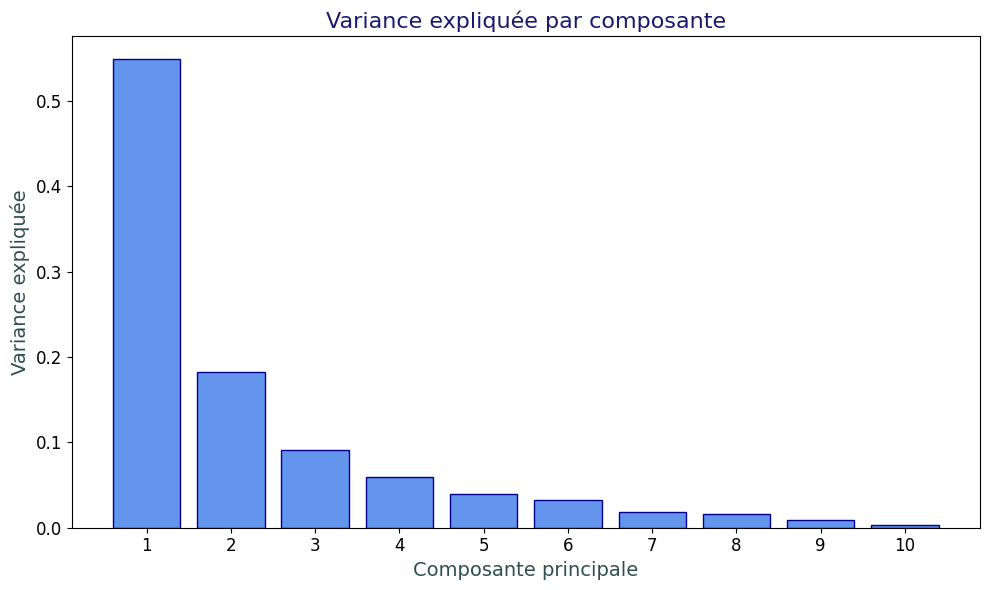

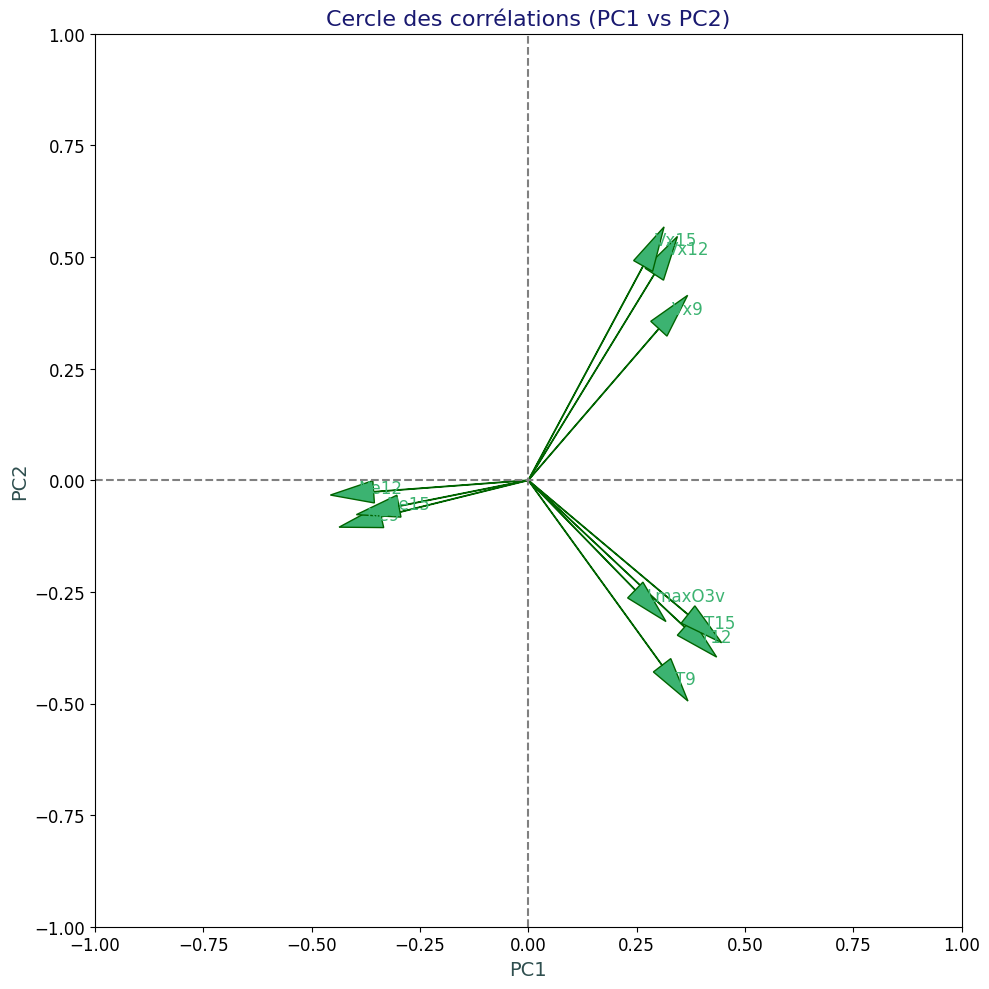

In [ ]:

# Sélection des variables quantitatives
quant_vars = ['T9', 'T12', 'T15', 'Ne9', 'Ne12', 'Ne15', 'Vx9', 'Vx12', 'Vx15', 'LmaxO3v']
X = ozone[quant_vars]

# Standardisation des données
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# ACP
pca = PCA()
pca.fit(X_std)

# Variance expliquée
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, color='cornflowerblue', edgecolor='darkblue')
plt.xlabel('Composante principale', fontsize=14, color='darkslategray')
plt.ylabel('Variance expliquée', fontsize=14, color='darkslategray')
plt.title('Variance expliquée par composante', fontsize=16, color='midnightblue')
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1), fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Cercle des corrélations
pcs = pca.components_
n = pcs.shape[1]
plt.figure(figsize=(10, 10))

# Flèches et textes
for i in range(n):
    plt.arrow(0, 0, pcs[0, i], pcs[1, i], head_width=0.05, head_length=0.1, fc='mediumseagreen', ec='darkgreen')
    plt.text(pcs[0, i]*1.1, pcs[1, i]*1.1, quant_vars[i], color='mediumseagreen', fontsize=12)

# Axes
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

# Limites et titre
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1', fontsize=14, color='darkslategray')
plt.ylabel('PC2', fontsize=14, color='darkslategray')
plt.title('Cercle des corrélations (PC1 vs PC2)', fontsize=16, color='midnightblue')

# Personnalisation des axes
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()


**Régression multiple**

                            OLS Regression Results                            
Dep. Variable:                 LmaxO3   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     29.48
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           1.15e-25
Time:                        17:26:01   Log-Likelihood:                 55.511
No. Observations:                 112   AIC:                            -89.02
Df Residuals:                     101   BIC:                            -59.12
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4407      0.275      8.874      0.0

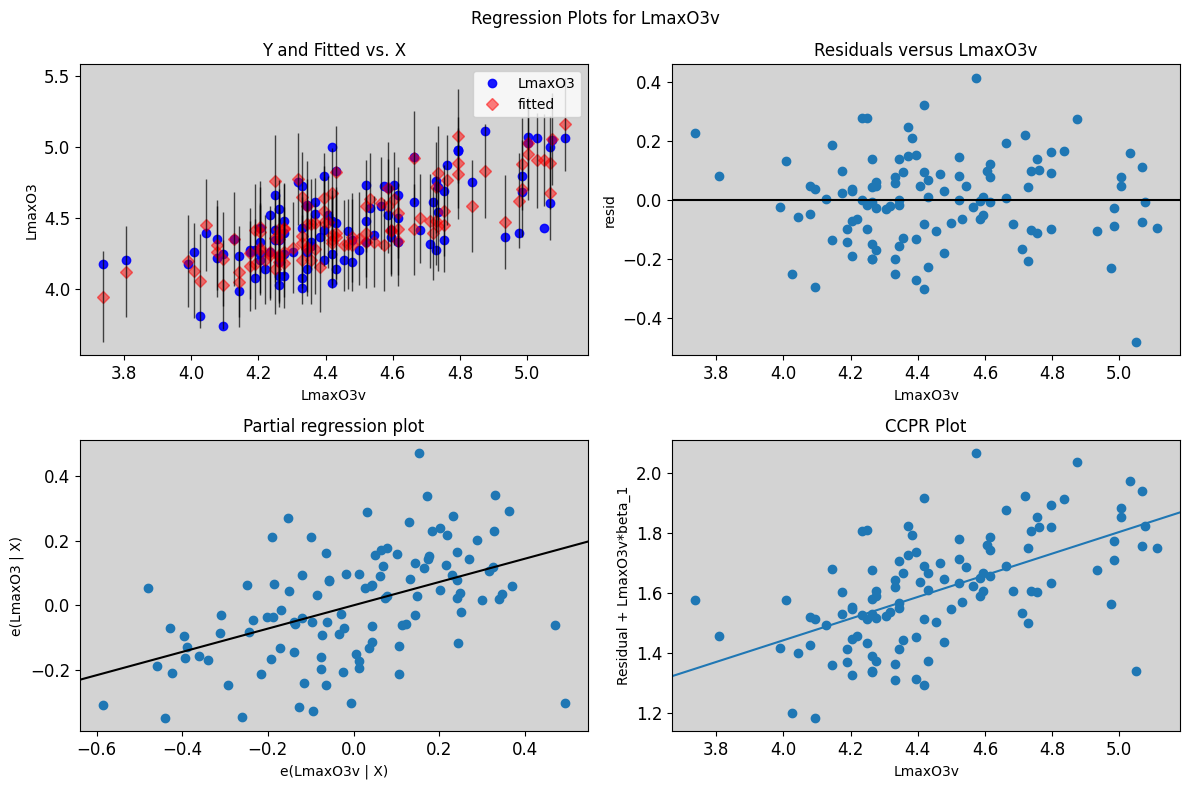

Ajout de la variable : T12
Ajout de la variable : LmaxO3v
Ajout de la variable : Ne9
Ajout de la variable : Vx9

Variables sélectionnées: ['T12', 'LmaxO3v', 'Ne9', 'Vx9']
                            OLS Regression Results                            
Dep. Variable:                 LmaxO3   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     77.31
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           1.11e-30
Time:                        17:26:04   Log-Likelihood:                 55.098
No. Observations:                 112   AIC:                            -100.2
Df Residuals:                     107   BIC:                            -86.60
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err       

In [ ]:

# Modèle complet
formula = 'LmaxO3 ~ LmaxO3v + T9 + T12 + T15 + Ne9 + Ne12 + Ne15 + Vx9 + Vx12 + Vx15'
model_full = ols(formula, data=ozone).fit()
print(model_full.summary())

# Diagnostic des résidus
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(model_full, 'LmaxO3v', fig=fig)

# Personnalisation du graphique
for ax in fig.axes:
    ax.set_facecolor('lightgray')
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)
fig.tight_layout()
plt.show()

# Sélection de modèle (stepwise)
def stepwise_selection(X, y):
    included = []
    while True:
        changed = False
        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < 0.05:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            print(f"Ajout de la variable : {best_feature}")

        # Backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > 0.05:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            print(f"Suppression de la variable : {worst_feature}")

        if not changed:
            break
    return included

# Préparation des données
X_vars = ['LmaxO3v', 'T9', 'T12', 'T15', 'Ne9', 'Ne12', 'Ne15', 'Vx9', 'Vx12', 'Vx15']
X_reg = ozone[X_vars]
y_reg = ozone['LmaxO3']

# Sélection des variables
selected_vars = stepwise_selection(X_reg, y_reg)
print("\nVariables sélectionnées:", selected_vars)

# Modèle réduit
formula_reduced = 'LmaxO3 ~ ' + ' + '.join(selected_vars)
model_reduced = ols(formula_reduced, data=ozone).fit()
print(model_reduced.summary())


**Comparaison des modèles avec PRESS**

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

def calculate_press(model, X, y):
    """
    Calcule le PRESS (Predicted Residual Sum of Squares) de manière robuste

    Parameters:
    model -- modèle statsmodels ajusté
    X -- variables explicatives (DataFrame)
    y -- variable réponse (Series)

    Returns:
    Valeur du PRESS
    """
    try:
        # Conversion en arrays numpy
        X = X.values if isinstance(X, pd.DataFrame) else X
        y = y.values if isinstance(y, pd.Series) else y

        # Ajout de la constante pour l'intercept
        X = sm.add_constant(X)

        # Vérification des dimensions
        if X.shape[0] != y.shape[0]:
            raise ValueError("Nombre d'observations incohérent entre X et y")

        # Calcul de la matrice hat (H = X(X'X)^-1X')
        xtx_inv = np.linalg.inv(X.T @ X)
        hat_matrix = X @ xtx_inv @ X.T

        # Calcul des résidus
        y_pred = model.predict(sm.add_constant(pd.DataFrame(X[:,1:], columns=model.model.exog_names[1:])))
        residuals = y - y_pred

        # Éléments diagonaux de H
        h_ii = np.diag(hat_matrix)

        # Calcul des résidus PRESS
        press_residuals = residuals / (1 - h_ii)

        # Calcul du PRESS
        return np.sum(press_residuals**2) / len(y)

    except Exception as e:
        print(f"Erreur dans calculate_press: {str(e)}")
        return None

# Préparation des données
X_simple = ozone[['LmaxO3v']]
X_full = ozone[['LmaxO3v', 'T9', 'T12', 'T15', 'Ne9', 'Ne12', 'Ne15', 'Vx9', 'Vx12', 'Vx15']]
X_reduced = ozone[selected_vars]  # Variables sélectionnées par stepwise
y = ozone['LmaxO3']

# Vérification des dimensions
print("Vérification des dimensions:")
print(f"- X_simple: {X_simple.shape}, y: {y.shape}")
print(f"- X_full: {X_full.shape}")
print(f"- X_reduced: {X_reduced.shape}")

# Calcul du PRESS
press_simple = calculate_press(model, X_simple, y)
press_full = calculate_press(model_full, X_full, y)
press_reduced = calculate_press(model_reduced, X_reduced, y)

# Affichage des résultats
if None not in [press_simple, press_full, press_reduced]:
    print("\nComparaison des modèles par PRESS:")
    print(f"- Modèle simple (1 var): {press_simple:.4f}")
    print(f"- Modèle complet ({X_full.shape[1]} var): {press_full:.4f}")
    print(f"- Modèle réduit ({len(selected_vars)} var): {press_reduced:.4f}")

    # Identification du meilleur modèle
    best_model = np.argmin([press_simple, press_full, press_reduced])
    model_names = ["Modèle simple", "Modèle complet", "Modèle réduit"]
    print(f"\nLe meilleur modèle selon PRESS est: {model_names[best_model]}")
else:
    print("\nErreur dans le calcul du PRESS pour au moins un modèle")

Vérification des dimensions:
- X_simple: (112, 1), y: (112,)
- X_full: (112, 10)
- X_reduced: (112, 4)

Comparaison des modèles par PRESS:
- Modèle simple (1 var): 0.0484
- Modèle complet (10 var): 0.0268
- Modèle réduit (4 var): 0.0240

Le meilleur modèle selon PRESS est: Modèle réduit




**Résultats du PRESS :**

Modèle simple (1 var) : 0.0484

Modèle complet (10 var) : 0.0268

Modèle réduit (4 var) : 0.0240 (meilleur)

**Interprétation :**

* Le modèle réduit (4 variables) montre le plus faible PRESS, indiquant qu'il a la meilleure capacité de généralisation (prédiction sur de nouvelles données).

Bien que le modèle complet (10 variables) ajuste mieux les données d'entraînement (R² plus élevé), il est moins performant en prévision (PRESS plus élevé) en raison du surajustement (overfitting).

Le modèle simple est clairement sous-optimal.

**Limites de l'analyse :**

Comme mentionné, cette analyse utilise des outils élémentaires (régression linéaire + sélection stepwise).

Le PRESS évalue la performance prédictive, mais d'autres métriques (AIC, BIC, validation croisée) pourraient confirmer ces résultats.

**Pistes d'amélioration :**

* Variables qualitatives : Intégrer le mois/jour dans une ANOVA à mesures répétées.

* Interactions : Tester des termes d'interaction (ex: Température × Vent).

* Modèles avancés : Random Forest ou GAM pour capturer des non-linéarités.

* Traitement des colinéarités : Régression ridge/lasso pour les variables corrélées (visible dans l'ACP).

**conclusion**

Le modèle réduit (4 variables) est optimal pour la prévision dans ce contexte, mais des analyses complémentaires pourraient encore améliorer les performances. La qualité de prédiction ne dépend pas seulement de la qualité d'ajustement, mais aussi de la capacité à éviter le surajustement, ce que confirme le PRESS.